# 📊 Connecting Academic Performance and Home Life  
## Spring 2025 Data Science Project  

**Group Members:**  
Kevin Truong, Chan Park, Charles Phan, Tony Zheng  

---

### 🧑‍🤝‍🧑 Member Contributions

#### **Kevin Truong**
- **Section C:** Conducted data exploration and generated summary statistics to understand key trends.  
- **Section F:** Interpreted analytical results and drew meaningful conclusions.  
- **Section G:** Compiled and formatted the final tutorial report for submission.

#### **Chan Park**
- **Section B:** Curated and preprocessed the dataset, ensuring data integrity and readiness.  
- **Section F:** Created visualizations and contributed to interpreting the results.

#### **Charles Phan**
- **Section C:** Participated in data exploration and initial statistical analysis.  
- **Section D:** Designed the machine learning approach and selected appropriate algorithms.  
- **Section E:** Trained models and evaluated their performance using test data.

#### **Tony Zheng**
- **Section A:** Proposed and conceptualized the project idea.  
- **Section C:** Contributed to exploratory data analysis and early statistical summaries.


## Introduction. 
<!-- TODO (Tony): The introduction should motivate your work: what is your topic? What
question(s) are you trying to answer with your analysis? Why is answering those
questions important? -->

As college students, we are interested in learning and understanding the factors that influence student performance. Analyzing the social and economic influences that affect education may allow systemic improvements in academic success and guide future research in this field.

## Data curation. 
<!-- TODO (Tony): Cite the source(s) of your data. Explain what it is. Transform the data
so that it is ready for analysis. For example, set up a database and use SQL to query
for data, or organize a pandas DataFrame. -->

> Dataset: __[Student Performance (Cortez)](https://archive.ics.uci.edu/dataset/320/student+performance)__

> Citation: Cortez, Paulo. “UCI Machine Learning Repository.” Archive.ics.uci.edu, 2014, archive.ics.uci.edu/dataset/320/student+performance.

<details>
    <summary> Attribute Descriptions </summary>
    # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 
4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 
4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 
'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)


</details>

## Exploratory Data Analysis

In [114]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import tukey_hsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Data Preprocessing

# Step 2: Load the Mathematics Dataset
# This dataset examines student achievement of two Portugese schools in the subject of mathematics
file = "student-mat.csv"  
df = pd.read_csv(file, sep=";") 

# Step 3: Parsing/converting data

# Converting numberic columns
num_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime","goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]

df[num_columns] = df[num_columns].apply(pd.to_numeric, errors='coerce')

# Step 4: There are no missing values in our Dataset

# Step 5: Display the data with a title
pd.set_option('display.max_columns', None)
print("Student Data")
df

Student Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


### Basic Data Exploration and Summary Statistics
The features of interest in our dataset are the first period grades, second period grades, and final grades (G1, G2, and G3, respectively). As such, much of our primary data analysis entails searching for correlations between the grade columns (especially G3) and other features in order to eventually test how the grade features can be predicted.

### Summary Statistics

In [13]:
print(f'The dataset has {df.shape[1]} columns/features and {df.shape[0]} datapoints.')

The dataset has 33 columns/features and 395 datapoints.


In [14]:

print('Summary statistics for numerical columns')
display(df.describe())
print('Modes of non-numerical columns')
display(df.drop(num_columns, axis = 1).mode())

Summary statistics for numerical columns


,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.711392,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.453690,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Modes of non-numerical columns


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,1,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no



### Statistical Method 1: Correlation Analysis of First/Second Period Grades and Final Grades

**Correlation Analysis**
We will be examining the relationship between G1 and G2 Grades to the final G3 grades.
We hypothesize that high G1 and G2 grades are good predictors of a higher G3 grade.
To accomodate for both periods, we will create two hypothesis pairs.

Null Hypothesis 1: G1 grades do not correlate to higher G3 grades
Alternative Hypothesis 1: G1 grades are positively correlated to G3 grades
Null Hypothesis 2: G2 grades do not correlate to higher G3 grades
Alternative Hypothesis 2: G2 grades are positively correlated to G3 grades

We will be computing the correlation value using the Pearson correlation coefficient and comparing the p-value to a significance value of 0.05.


G1 vs. G3 Pearson Correlation: 0.8014679320174142
G1 vs. G3 P-Value: 9.001430312276616e-90
We Reject Null Hypothesis 1 (P-Value < 0.05): True

G2 vs. G3 Pearson Correlation: 0.9048679892693011
G2 vs. G3 P-Value: 7.625719154048129e-148
We Reject Null Hypothesis 2 (P-Value < 0.05): True



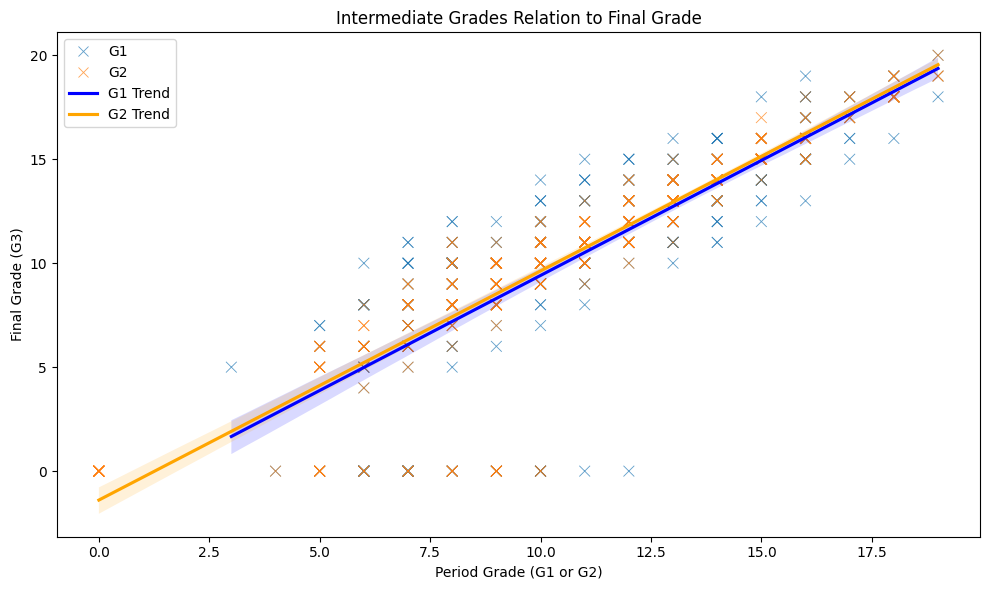

In [15]:
sig_val = 0.05

# Calculate Pearson correlation and p-value for G1 vs G3
g1_corr, g1_pval = pearsonr(df["G1"], df["G3"])

# Calculate Pearson correlation and p-value for G2 vs G3
g2_corr, g2_pval = pearsonr(df["G2"], df["G3"])

print(f"""
G1 vs. G3 Pearson Correlation: {g1_corr}
G1 vs. G3 P-Value: {g1_pval}
We Reject Null Hypothesis 1 (P-Value < {sig_val}): {g1_pval < sig_val}

G2 vs. G3 Pearson Correlation: {g2_corr}
G2 vs. G3 P-Value: {g2_pval}
We Reject Null Hypothesis 2 (P-Value < {sig_val}): {g2_pval < sig_val}
""")

# We create the scatter plot comparing G1 and G2 to G3

#We melt G1 and G2 together to display both on the same axis
df_long = pd.melt(df, id_vars=["G3"], value_vars=["G1", "G2"],
                  var_name="Period", value_name="Grade")

# Create a scatter plot with regression lines for both G1 and G2 vs G3
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_long,
    x="Grade",
    y="G3",
    hue="Period",
    alpha=0.7,
    s=60,
    marker="x"
)
sns.regplot(data=df[df["G1"].notnull()], x="G1", y="G3", scatter=False, label="G1 Trend", color="blue")
sns.regplot(data=df[df["G2"].notnull()], x="G2", y="G3", scatter=False, label="G2 Trend", color="orange")

plt.title("Intermediate Grades Relation to Final Grade")
plt.xlabel("Period Grade (G1 or G2)")
plt.ylabel("Final Grade (G3)")
plt.legend()
plt.tight_layout()
plt.show()


**Correlation Analysis: Conclusion**
G1 and G2 grades have a strong positive correlation to the final G3 grades.
This indicates that the mid-year academic performance of students are a statistically significant predictor of their final grades.

Based on the scatter plot, G1 grades have a higher variance than G2 grades, and there are a number of students who finished with a G3 grade of 0 despite G1 and G2 grades.
These entry points could indicate outlier students who did not finish the academic year or changed schools.

G2's higher p-value also indicates that G2 grades are a better predictor of G3 grades than G1 grades.

### Statistical Method 2: Comparison of Final Grades with/without Family Educational Support

**Welch's T-test** After splitting the dataset by whether the students have family educational support, we will be comparing the means of final G3 grades. We hypothesize that the expected values of both samples are identical. We will test this at a significance level of 0.05 using Welch's T-test, which is more suitable when comparing samples with unequal sizes and/or variances.

> $H_0$: Both samples have identical expected value.

> $H_A$: The samples have different expected values.

In [16]:
sig_val = 0.05
with_fam_sup = df[df['famsup'] == 'yes']['G3']
without_fam_sup = df[df['famsup'] == 'no']['G3']

# Two-tailed Welch's T-test
ttest_pval = ttest_ind(with_fam_sup, without_fam_sup, axis=0, equal_var=False)

print(f'P-value = {ttest_pval.pvalue} > 0.05 - FAIL to reject null hypothesis / It is not unreasonable to assume the samples have identical expected values.')

P-value = 0.4397524258692145 > 0.05 - FAIL to reject null hypothesis / It is not unreasonable to assume the samples have identical expected values.


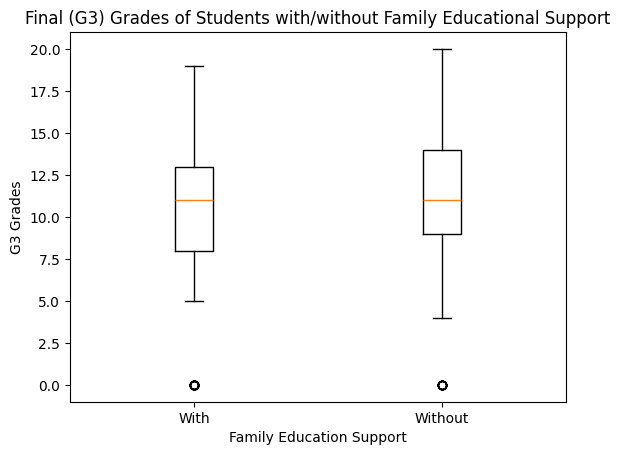

In [17]:
fig, ax0 = plt.subplots()
ax0.boxplot([with_fam_sup, without_fam_sup])
plt.title('Final (G3) Grades of Students with/without Family Educational Support')
plt.xlabel("Family Education Support")
ax0.set_xticklabels(['With', 'Without'])
plt.ylabel("G3 Grades")
plt.show()

### Statistical Method 3: Comparison of final grades with study time.
**ANOVA Hypothesis Test**

> $H_0$: The student's frequency of going out with friends does not have an effect on the student's final grade. 

> $H_A$: The student's frequency of going out with friends has an effect on the student's final grade.

In [18]:
sig_val = 0.05
groups = df.groupby(['goout'])['G3']
one = groups.get_group((1,))
two = groups.get_group((2,))
three = groups.get_group((3,))
four = groups.get_group((4,))
five = groups.get_group((5,))
res = f_oneway(one, two, three, four, five)

print(f'P-value = {res.pvalue} < 0.05 - Reject the null hypothesis. The low p-value indicates evidence that the alternate hypothesis is likely to be true. \nIt\'s likely that the student\'s frequency of going out with friends has an effect on the student\'s final grade.')

P-value = 0.014380078895198916 < 0.05 - Reject the null hypothesis. The low p-value indicates evidence that the alternate hypothesis is likely to be true. 
It's likely that the student's frequency of going out with friends has an effect on the student's final grade.


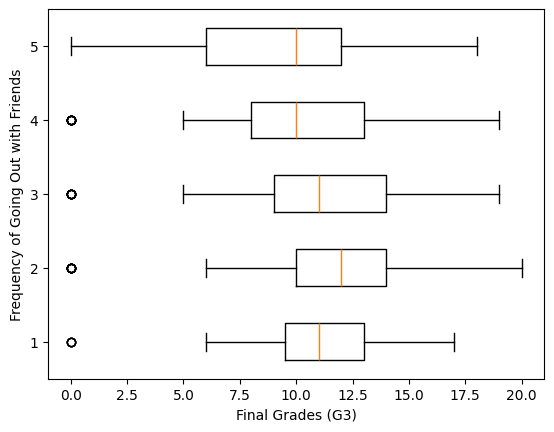

In [19]:
plt.boxplot([one, two, three, four, five], orientation='horizontal')

plt.xlabel('Final Grades (G3)')
plt.ylabel('Frequency of Going Out with Friends')
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['1', '2', '3', '4', '5'])

plt.show()

**Post Hoc Analysis**\
\
Since we used ANOVA to reject the null hypothesis, we should run a post hoc analysis to find out which groups are different from each other.

In [20]:
posthoc = tukey_hsd(one, two, three, four, five)
print(posthoc)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.325     0.711    -4.189     1.540
 (0 - 2)     -1.092     0.824    -3.902     1.718
 (0 - 3)      0.218     1.000    -2.697     3.134
 (0 - 4)      0.832     0.948    -2.270     3.933
 (1 - 0)      1.325     0.711    -1.540     4.189
 (1 - 2)      0.233     0.995    -1.406     1.871
 (1 - 3)      1.543     0.137    -0.271     3.357
 (1 - 4)      2.156     0.041     0.057     4.256
 (2 - 0)      1.092     0.824    -1.718     3.902
 (2 - 1)     -0.233     0.995    -1.871     1.406
 (2 - 3)      1.310     0.231    -0.416     3.037
 (2 - 4)      1.924     0.071    -0.100     3.948
 (3 - 0)     -0.218     1.000    -3.134     2.697
 (3 - 1)     -1.543     0.137    -3.357     0.271
 (3 - 2)     -1.310     0.231    -3.037     0.416
 (3 - 4)      0.613     0.938    -1.556     2.782
 (4 - 0)     -0.832     0.948    -3.933     2.270
 (4 - 1)     -2.156     0.041   

**Interpretation**\
\
From Tukey's HSD pairwise post hoc analysis, we can see that groups 1 and 4 have a p-value of 0.041 < 0.05. Note that the output indexes from 0, so 'group 1' corresponds to '2' and 'group 4' corresponds to 5.\
\
We can see that when comparing students who gave scores of 2 and 4 when asked how frequently they go out with friends, there is a significant difference between the final grades.

## Primary analysis. 
<!-- TODO (Charles): Based on the results of your exploration, choose a machine
learning technique (e.g., classification, regression, clustering, etc.) that will help you
answer the questions you posed in the introduction. Explain your reasoning. -->

We are ultimately looking at how various factors affect academic performance, as measured by the final (G3) grade. This metric, which we will try to predict, is a continuous variable, meaning that it can take on any value within a range. As such, we will select a machine learning model capable of **regression**. 

Based on our first statistical analysis method, it seems like there is a strong linear correlation at least between the intermediate grades and the final grades, so let's use a linear regression model!

Now that we have chosen our model, a little more preprocessing is necessary. Many of the variables are currently strings, which aren't very suitable for a linear regression model. We should convert them to numerical values first (booleans are also fine).

In [104]:
# Converting most string binary features to numerical binary features, which are more suitable to machine learning. 
# Let's do one-hot encoding for features where an assumption of ordinality could introduce bias. This will introduce
# more features, but it's not too big of a problem in this case.

df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
display(df_encoded)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,True,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,False,True,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False


Standardization isn't really necessary for linear regression, so this is really all we have to worry about for feature engineering.

Let's being training our model. It's usually a pretty good idea to partition our data so that we train on the majority of available data and test on the rest. This helps us to evaluate our model's accuracy.

In [ ]:
X = df_encoded.drop('G3', axis=1) # Inputs
y = df_encoded['G3'] # Targets

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model on the training data
model = LinearRegression().fit(X_train, y_train)

# Calculate the R^2 score based on the model's performance on the test data. A higher score (closer to 1) indicated a better fit,
# # while a lower score (closer to 0) indicates a worse fit
model.score(X_test, y_test)

0.8076925507913288

## Visualization. 
<!-- TODO (Chan): Explain the results and insights of your primary analysis with at least
one plot. Make sure that every element of the plots are labeled and explained (don’t
forget to include a legend!). -->

## Insights and Conclusions. 
<!-- TODO (Kevin): After reading through the project, does an uninformed
reader feel informed about the topic? Would a reader who already knew about the
topic feel like they learned more about it? -->